In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as spy
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [33]:
le = LabelEncoder()

In [34]:
data = pd.read_csv('Datasets/HCP.csv')
data

,patientid,age,gender,department,diagnosis,admissiondate,dischargedate,treatmentcost,doctorname,readmitted,city,severity,insuranceprovider,treatmenttype,bedtype,paymentmethod,satisfactionscore,length_of_stay,age_group
0,P0001,38,Male,Orthopedics,Fracture,2024-01-19,2024-01-30,89503,Dr. Mehta,Yes,Kolkata,Moderate,LIC Health,Surgery,General,Insurance,3,11,Adult (18-64)
1,P0002,57,Male,Pediatrics,Asthma,2024-07-01,2024-07-06,23659,Dr. Banerjee,Yes,Chennai,Severe,Star Health,Observation,Private,Online,1,5,Adult (18-64)
2,P0003,32,Female,Neurology,Stroke,2024-02-19,2024-03-04,316652,Dr. Iyer,Yes,Delhi,Mild,Star Health,Observation,General,Cash,6,14,Adult (18-64)
3,P0004,22,Male,Orthopedics,Joint Replacement,2024-03-05,2024-03-10,74980,Dr. Singh,Yes,Chennai,Mild,ICICI Lombard,Therapy,Semi-Private,Credit Card,9,5,Adult (18-64)
4,P0005,46,Female,Pediatrics,Asthma,2024-05-03,2024-05-08,92331,Dr. Iyer,Yes,Mumbai,Moderate,ICICI Lombard,Surgery,ICU,Credit Card,8,5,Adult (18-64)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,88,Female,Cardiology,Arrhythmia,2025-07-28,2025-08-05,77977,Dr. Sharma,No,Hyderabad,Moderate,LIC Health,Medication,General,Cash,7,8,Senior (65+)
996,P0997,66,Male,Orthopedics,Joint Replacement,2024-01-16,2024-01-25,141590,Dr. Banerjee,Yes,Chennai,Severe,LIC Health,Observation,General,Credit Card,7,9,Senior (65+)
997,P0998,12,Female,General Surgery,Gallstones,2024-07-27,2024-08-10,143001,Dr. Banerjee,No,Mumbai,Severe,HDFC Ergo,Therapy,Private,Credit Card,7,14,Pediatric (0-17)
998,P0999,12,Male,Neurology,Migraine,2024-06-10,2024-06-12,227324,Dr. Khan,Yes,Bengaluru,Severe,New India Assurance,Surgery,General,Insurance,6,2,Pediatric (0-17)


In [35]:
#Analysis no: 1: Growth of readmission rates over the months
data.dtypes

patientid            object
age                   int64
gender               object
department           object
diagnosis            object
admissiondate        object
dischargedate        object
treatmentcost         int64
doctorname           object
readmitted           object
city                 object
severity             object
insuranceprovider    object
treatmenttype        object
bedtype              object
paymentmethod        object
satisfactionscore     int64
length_of_stay        int64
age_group            object
dtype: object

In [36]:
data.columns

Index(['patientid', 'age', 'gender', 'department', 'diagnosis',
       'admissiondate', 'dischargedate', 'treatmentcost', 'doctorname',
       'readmitted', 'city', 'severity', 'insuranceprovider', 'treatmenttype',
       'bedtype', 'paymentmethod', 'satisfactionscore', 'length_of_stay',
       'age_group'],
      dtype='object')

In [37]:
data['Month'] = data['dischargedate'].apply(

    lambda dt: ((((datetime.strptime(dt, '%Y-%m-%d')).month)% 12)) + 1
)

data

,patientid,age,gender,department,diagnosis,admissiondate,dischargedate,treatmentcost,doctorname,readmitted,city,severity,insuranceprovider,treatmenttype,bedtype,paymentmethod,satisfactionscore,length_of_stay,age_group,Month
0,P0001,38,Male,Orthopedics,Fracture,2024-01-19,2024-01-30,89503,Dr. Mehta,Yes,Kolkata,Moderate,LIC Health,Surgery,General,Insurance,3,11,Adult (18-64),2
1,P0002,57,Male,Pediatrics,Asthma,2024-07-01,2024-07-06,23659,Dr. Banerjee,Yes,Chennai,Severe,Star Health,Observation,Private,Online,1,5,Adult (18-64),8
2,P0003,32,Female,Neurology,Stroke,2024-02-19,2024-03-04,316652,Dr. Iyer,Yes,Delhi,Mild,Star Health,Observation,General,Cash,6,14,Adult (18-64),4
3,P0004,22,Male,Orthopedics,Joint Replacement,2024-03-05,2024-03-10,74980,Dr. Singh,Yes,Chennai,Mild,ICICI Lombard,Therapy,Semi-Private,Credit Card,9,5,Adult (18-64),4
4,P0005,46,Female,Pediatrics,Asthma,2024-05-03,2024-05-08,92331,Dr. Iyer,Yes,Mumbai,Moderate,ICICI Lombard,Surgery,ICU,Credit Card,8,5,Adult (18-64),6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,88,Female,Cardiology,Arrhythmia,2025-07-28,2025-08-05,77977,Dr. Sharma,No,Hyderabad,Moderate,LIC Health,Medication,General,Cash,7,8,Senior (65+),9
996,P0997,66,Male,Orthopedics,Joint Replacement,2024-01-16,2024-01-25,141590,Dr. Banerjee,Yes,Chennai,Severe,LIC Health,Observation,General,Credit Card,7,9,Senior (65+),2
997,P0998,12,Female,General Surgery,Gallstones,2024-07-27,2024-08-10,143001,Dr. Banerjee,No,Mumbai,Severe,HDFC Ergo,Therapy,Private,Credit Card,7,14,Pediatric (0-17),9
998,P0999,12,Male,Neurology,Migraine,2024-06-10,2024-06-12,227324,Dr. Khan,Yes,Bengaluru,Severe,New India Assurance,Surgery,General,Insurance,6,2,Pediatric (0-17),7


In [7]:
data['readmitted'] = le.fit_transform(data['readmitted'])
map1 = data.groupby(['Month'])['readmitted'].count()

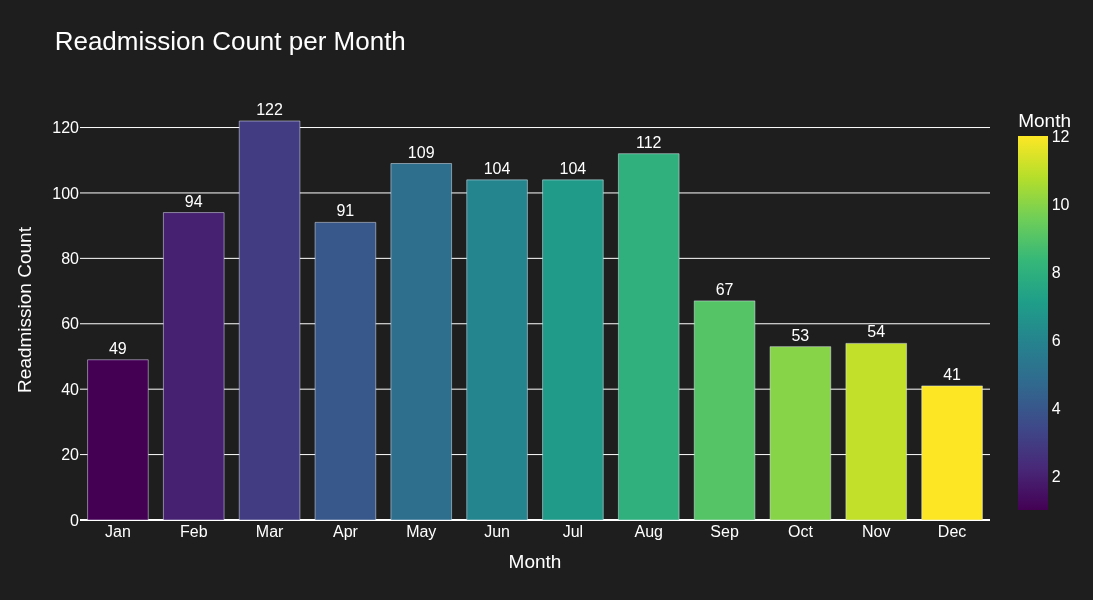

In [8]:
dark_colors = px.colors.sequential.Viridis

# Create bar chart
fig = px.bar(
    map1.reset_index(),
    x='Month',
    y='readmitted',
    text='readmitted',
    title="Readmission Count per Month",
    color='Month',
    color_continuous_scale=dark_colors
)

fig.update_traces(textposition='outside')

# Dark layout styling
fig.update_layout(
    width=1000,
    height=600,
    title_font=dict(size=26, color='white'),
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        color='white'
    ),
    
    yaxis=dict(
        title="Readmission Count",
        color='white'
    ),
    plot_bgcolor="#1e1e1e",
    paper_bgcolor="#1e1e1e",
    font=dict(family="Arial", size=16, color='white'),
)

fig.show()

Enter the month 10


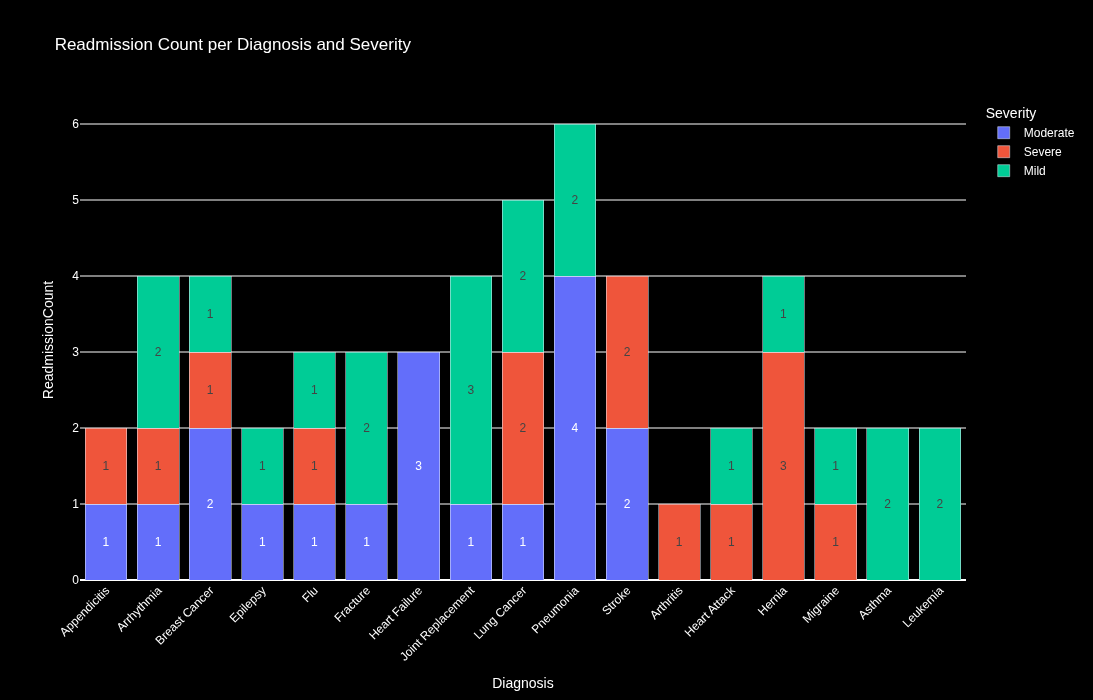

In [152]:
#Plot no: 2: For a single month, show for all diagnosis and severity the readmission counts

month = int(input('Enter the month'))
refined = data[data['Month'] ==  month]

mapForDiagandSever1Month = refined.groupby(['diagnosis', 'severity'])['readmitted'].count()

mapForDiagandSever1Month = pd.Series(mapForDiagandSever1Month).reset_index()
mapForDiagandSever1Month.columns = ['Diagnosis', 'Severity', 'ReadmissionCount']

fig = px.bar(
    mapForDiagandSever1Month, 
    x='Diagnosis', 
    y='ReadmissionCount', 
    color='Severity', 
    title='Readmission Count per Diagnosis and Severity',
    text='ReadmissionCount'
)

fig.update_traces(
    textposition='inside',       # puts the numbers inside bars
    insidetextanchor='middle'    # centers the numbers
)

fig.update_layout(
    barmode='stack',
    xaxis_tickangle=-45,         # slanted x-axis labels
    uniformtext_minsize=10,
    uniformtext_mode='hide',
    width = 800,
    height = 700,
    plot_bgcolor='black',      # background dark
    paper_bgcolor='black',
    font_color='white' 
)

fig.show()

Enter Doctor name:  Dr. Khan


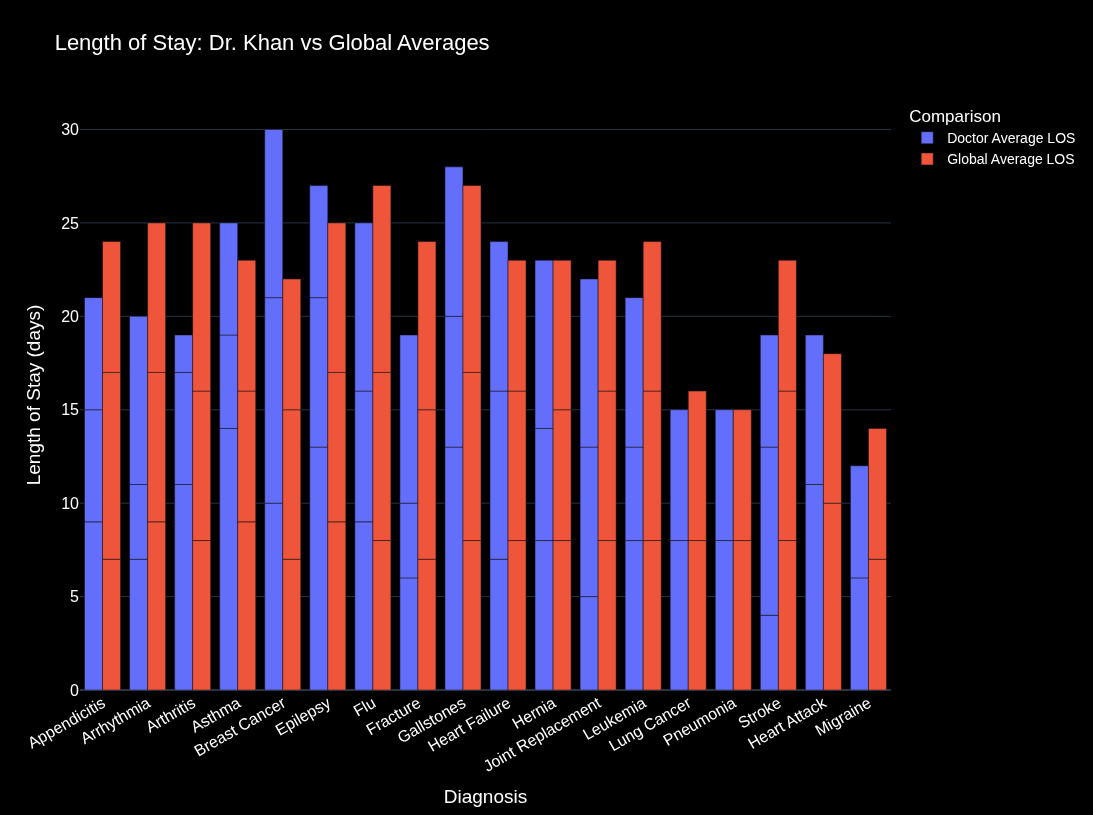

In [31]:
#Plot no: 3 A Multiple Barplot comparing Length of Stay for that Particular doctor (For the particular severity + disease) and global average LOS for the same severity and disease

plot3_data = data.groupby(['doctorname', 'severity', 'diagnosis'])['length_of_stay'].mean()
plot3_data_glob = data.groupby(['severity', 'diagnosis'])['length_of_stay'].mean()

plot3_data = plot3_data.reset_index()
plot3_data_glob = plot3_data_glob.reset_index()


plot3_data = pd.merge(plot3_data, plot3_data_glob, on=['severity', 'diagnosis'], how='inner')


plot3_data['length_of_stay_y'] = plot3_data['length_of_stay_y'].astype(int)
plot3_data['length_of_stay_x'] = plot3_data['length_of_stay_x'].astype(int)

plot3_data.rename(columns={
    'length_of_stay_x': 'Doctor Average LOS',
    'length_of_stay_y': 'Global Average LOS'
}, inplace=True)


inp = input("Enter Doctor name: ")
plot3_data = plot3_data[plot3_data['doctorname'] == inp]


fig = px.bar(
    plot3_data,
    x="diagnosis",  # diseases on x-axis
    y=["Doctor Average LOS", "Global Average LOS"],  # grouped bars
    barmode="group",
    title=f"Length of Stay: {inp} vs Global Averages",
)


fig.update_layout(
    template="plotly_dark",          # dark background
    plot_bgcolor="black",            # black plotting area
    paper_bgcolor="black",           # black outside
    font=dict(size=16, color="white"),  # bigger readable font
    title=dict(font=dict(size=22)),  # bigger title
    legend=dict(
        title="Comparison",
        font=dict(size=14, color="white")
    ),
    xaxis=dict(title="Diagnosis", tickangle=-30),  # rotate x labels
    yaxis=dict(title="Length of Stay (days)"),
    height=800, width=1200           # bigger figure size
)

fig.show()